# TASK 1 : Illustration of Web crawling with scrapy spider

This application is a simple search engine similar to Google Scholar designed to retrieve only papers published by members of the Research Centre for Intelligent Healthcare (RCIH) in Coventry University. 

In [61]:
#installing scrapy crawling pre-requisities 
!pip install crochet

In [62]:
#installing scrapy crawling pre-requisities 
!pip install scrapy

In [63]:
#scrapy importation and crawler libraries

from crochet import setup, wait_for
setup()

from scrapy.crawler import CrawlerRunner
import scrapy


In [64]:

#custom-built spider bot for
class WebCrawler(scrapy.Spider):
  name = "rcih"

  start_urls = ["https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/"]

  custom_settings = {
      "RSSFEEDS": {
          "rcih_publications.csv": {
              "format": "csv",
              "overwrite": True
          }
      }
  }



#custom-built method within scrapy to retrieving papers and books published by members of RCIH

  def parse(self, response):
    publications = response
    list_of_publication = publications.css('li.list-result-item')
    publication_title = publications.css('h3.title span::text').get()
   
    for topic in publications.css('li.list-result-item'):        
      pub_tit = topic.css('h3.title span::text').get()
      pub_auth = topic.css('a.person span::text').getall()
      pub_date_year = topic.css('span.date::text').get()
      pub_link = topic.css ('h3.title a.link::attr(href)').extract()
      author_link = topic.css('a.person::attr(href)').getall()   
    
      yield{"Authors":pub_auth,"Titles":pub_tit,"Profiles":author_link, "Publications":pub_link,"Year of Publication":pub_date_year}

        
#handling pagination of the target website/domain 
    next_page = response.css('a.nextLink::attr(href)').extract()
    
#if else statement checking for the existence of next page of publications to scrape   
    if next_page is not None:
        
      next_page = response.urljoin(next_page[0])
      print("Clickable links to navigate to RCIH Publications \n", next_page)
        
#creating request for next page    
      yield scrapy.Request(next_page, callback=self.parse)
    
  custom_settings = {
      "RSSFEEDS": {
          "rcih_publications.csv": {
              "format": "csv",
              "overwrite": True
          }
      }
  }


@wait_for(timeout=60)
def spider_bot():
  spider_tool = CrawlerRunner()
  crawler = spider_tool.crawl(WebCrawler)
  return crawler

spider_bot()

Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=1
Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=2
Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=3
Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=4
Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=5
Clickable links to navigate to RCIH Publications 
 https://pureportal.coventry.ac.uk/en/organisations/research-centre-for-intelligent-healthcare/publications/?page=6
Clic

In [28]:

import os
os.getcwd()

'C:\\Users\\User'

In [65]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from yaml import tokens

In [66]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
#loading the crawled data save in csv format
publications = "C:\\Users\\User\\rcih_publications.csv"

In [32]:
# import csv

# with open("C:\\Users\\User\\rcih_publications.csv") as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     for row in csv_reader:
#        print(row)

In [68]:
#function declaration for inverted_index

stemmer = PorterStemmer()

def invertedIndex(publications):
  df = pd.read_csv(publications)

  df = df['Titles']
  
  corpus={}

#initialization of document ID for counting of terms in the 
  docid = 0
  for i in df:
    tokens = word_tokenize(i)
    token_lower = [w.lower() for w in tokens if w.isalnum()]
    stopped_words = [w for w in token_lower if w not in stopwords.words('english')]
    stemmed = [stemmer.stem(w) for w in stopped_words]

    for stem in stemmed:
      value = corpus.get(stem)
      if value == None:
        count = [1, [docid]]
        corpus[stem] = count
      else:
        count = corpus[stem]
        if docid not in count[1]:
          count[1].append(docid)
          count[0] += 1

    docid += 1

  return corpus

In [69]:
inverted = invertedIndex(publications)

In [70]:
inverted

{'access': [5, [0, 200, 216, 306, 500]],
 'specialist': [4, [0, 104, 220, 314]],
 'support': [7, [0, 123, 317, 436, 513, 517, 551]],
 'stop': [7, [0, 44, 175, 215, 288, 431, 513]],
 'smoke': [5, [0, 79, 331, 391, 513]],
 'pregnanc': [4, [0, 99, 482, 505]],
 'qualit': [16,
  [0, 9, 93, 115, 147, 190, 206, 218, 248, 402, 482, 523, 546, 549, 566, 587]],
 'studi': [109,
  [0,
   3,
   4,
   7,
   11,
   13,
   15,
   19,
   20,
   22,
   25,
   28,
   29,
   48,
   55,
   56,
   63,
   72,
   73,
   82,
   93,
   94,
   95,
   102,
   103,
   109,
   128,
   132,
   137,
   149,
   151,
   152,
   154,
   155,
   156,
   157,
   158,
   159,
   160,
   161,
   162,
   174,
   189,
   191,
   193,
   194,
   196,
   208,
   215,
   218,
   226,
   229,
   248,
   261,
   263,
   265,
   272,
   290,
   291,
   292,
   303,
   304,
   305,
   328,
   329,
   330,
   332,
   334,
   336,
   350,
   362,
   363,
   368,
   372,
   375,
   377,
   386,
   391,
   399,
   401,
   427,
   429,
  

In [71]:
#custom-built function for data pre-processing
def textCleaning(text):
  tokens = word_tokenize(text)
  token = [w.lower() for w in tokens if w.isalnum()]
  stopped_words = [w for w in token if w not in stopwords.words('english')]
  stemming = [stemmer.stem(w) for w in stopped_words]
  return stemming

# Search Engine Interface with python on jupyter notebook


In [ ]:
searchQuery = input("Please insert publication keywords here: \n")
print("\n")
print("\n")
print("\n")
searchQuery = searchQuery.lower()
searchQuery = textCleaning(searchQuery)

print("The search engine will search for publications related to these keywords... \n", searchQuery)
print("\n")
print("\n")


print(searchQuery)

#
postlists = []

for query in searchQuery:
  postlist = inverted.get(query)
  if postlist is not None:
    postlists.append(postlist[1])
print(postlists)

In [73]:

df = pd.read_csv("C:\\Users\\User\\rcih_publications.csv")

#
try:
  posted_list = set.union(*map(set, postlists))

except Exception:
  posted_list = "None"
posted_list = list(posted_list)


try:
  all_post_index = df.iloc[posted_list]
except Exception:
   all_post_index = "None"


print(all_post_index)

                                   Authors  \
512  Szczepura, A.,Holliday, N.,Oxford, S.   
513                             Lycett, D.   
514                                Liu, H.   
3                                      NaN   
4                                      NaN   
..                                     ...   
500                              Magee, P.   
501                                    NaN   
507                            Tapp, R. J.   
509                          O'Doherty, L.   
510                                    NaN   

                                                Titles  \
512  Raising the Digital Profile of Facial Palsy: N...   
513  Referral to Slimming World in UK Stop Smoking ...   
514  Regional High Wall Shear Stress Associated Wit...   
3    Adolescent transport and unintentional injurie...   
4    Age–sex differences in the global burden of lo...   
..                                                 ...   
500  MyHealth - Developing accessible hea

# TASK 2 : Document Clustering with K-MEANS Algorithm

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer


raw_data = pd.read_csv('C://Users//User//document_clustercsv.csv', encoding = 'unicode_escape', header=None)

document = raw_data.iloc[:,2].apply(str)
print(len(document))
print(document)

29
0     categories
1       business
2       business
3       business
4       business
5       business
6       business
7       business
8       business
9       business
10        health
11        health
12        health
13        health
14        health
15        health
16        health
17        health
18        health
19        sports
20        sports
21        sports
22        sports
23        sports
24        sports
25        sports
26        sports
27        sports
28           nan
Name: 2, dtype: object


In [77]:
#
vocabs = stopwords.words('english')
print(vocabs)



stemmer = PorterStemmer()
selected_docs = []
for doc in document:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in vocabs:
            tmp += stemmer.stem(w) + " "
    selected_docs.append(tmp)

print(selected_docs)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(selected_docs)
print(X.todense())

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [79]:

from sklearn.cluster import KMeans


K = 3 
model = KMeans(n_clusters=K)
model.fit(X)


print(model.labels_)

[0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


In [80]:
Y = vectorizer.transform(["Brazil will face Switzerland in the World Cup on Monday without their talisman Neymar, ruled out by an ankle injury suffered in their opening 2-0 win against Serbia."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["The NHS is now offering the second monkeypox vaccine dose to everyone who is eligible, offering long term protection against the virus. Almost 68,000 people have been vaccinated against monkeypox since the first cases in this outbreak were identified in England in May this year. The second monkeypox vaccination offers long-lasting protection, and can be"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["The two biggest companies that have signed up are Atom Bank and global marketing company Awin, who each have about 450 staff in the UK. They have been accredited by the four-day week campaign, meaning they have demonstrated that they have genuinely reduced hours for workers rather than forcing them into longer days."])
prediction = model.predict(Y)
print(prediction)


[0]
[0]
[0]


## System Test of Performance

In [81]:
vect_doc = ["football is a new game played all over the world. Qatar is going to host the next tournament",
             "Wall Street financial apocalypse started when people began to realise the issues with the new your stock exchange.",
             "There are too many cases of malaria, and other diseases. Cancer is another widespread disease to be on the rise"
           ]
vectorized_docs = []
for doc in vect_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in vocabs:
            tmp += stemmer.stem(w) + " "
    vectorized_docs.append(tmp)

print(vectorized_docs)

Y = vectorizer.transform([vectorized_docs[0]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([vectorized_docs[1]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([vectorized_docs[2]])
prediction = model.predict(Y)
print(prediction)


['footbal new game play world . qatar go host next tournament ', 'wall street financi apocalyps start peopl began realis issu new stock exchang . ', 'there mani case malaria , diseas . cancer anoth widespread diseas rise ']
[0]
[0]
[0]


C:\Users\User\AppData\Local\Temp\ipykernel_13052\3173872425.py:11: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\3173872425.py:11: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\3173872425.py:11: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\3173872425.py:11: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\3173872425.py:11: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller 

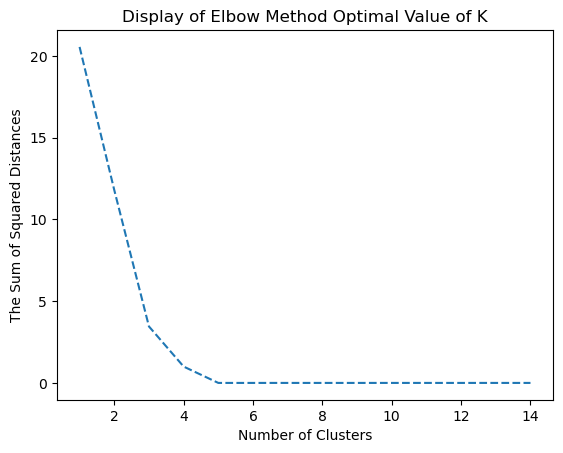

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
SSD = []

#range of optimal value of K
K = range(1,15)

#finding optimal value of K
for k in K:
   k_means = KMeans(n_clusters=k, n_init=20, max_iter=300)
   k_means = k_means.fit(X)
   SSD.append(k_means.inertia_)

plt.plot(K, SSD, '--')
plt.xlabel('Number of Clusters')
plt.ylabel('The Sum of Squared Distances')
plt.title('Display of Elbow Method Optimal Value of K')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13052\677773181.py:5: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\677773181.py:5: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\677773181.py:5: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\677773181.py:5: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
C:\Users\User\AppData\Local\Temp\ipykernel_13052\677773181.py:5: sklearn.exceptions.ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clu

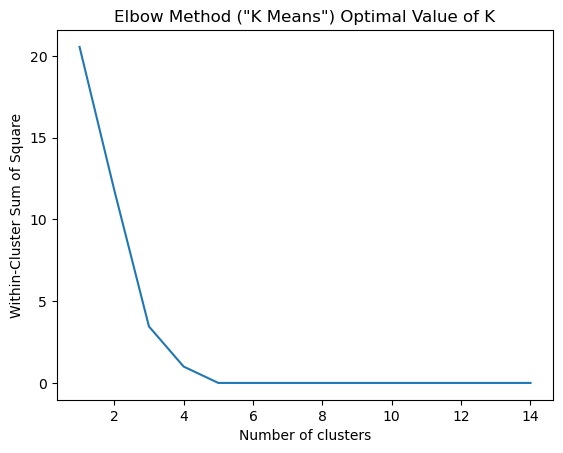

In [83]:
WCSS = []

for c in range(1, 15):
    k_means = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=20, random_state=0)
    k_means.fit(X)
    WCSS.append(k_means.inertia_)


plt.plot(range(1, 15), WCSS)
plt.title('Elbow Method ("K Means") Optimal Value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

In [84]:


centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
K = 3

topic1 = []
topic2 = []
topic3 = []


#display 25 features per cluster
for i in range(K):
    print("Order of Cluster Appearance %d:" % i)
    for j in centroids[i, :25]: 
        print (' %s' % terms[j])
        if i == 0:
          topic1.append(terms[j])
        elif i == 1:
          topic2.append(terms[j])
        elif i == 2:
          topic3.append(terms[j])


Order of Cluster Appearance 0:
 sport
 nan
 categori
 health
 busi
Order of Cluster Appearance 1:
 busi
 sport
 nan
 health
 categori
Order of Cluster Appearance 2:
 health
 sport
 nan
 categori
 busi


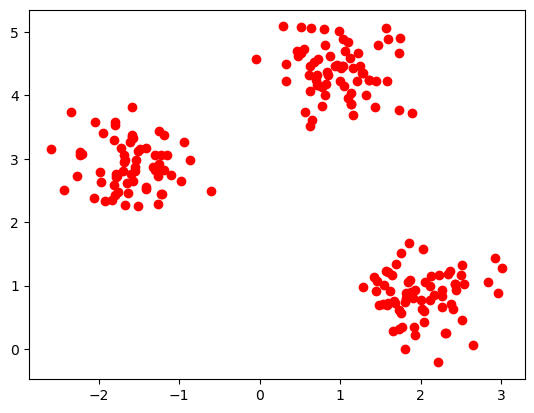

In [85]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=200, centers=3, cluster_std=0.40, random_state=0)
plt.scatter(X[:,0], X[:,1], c = 'red')

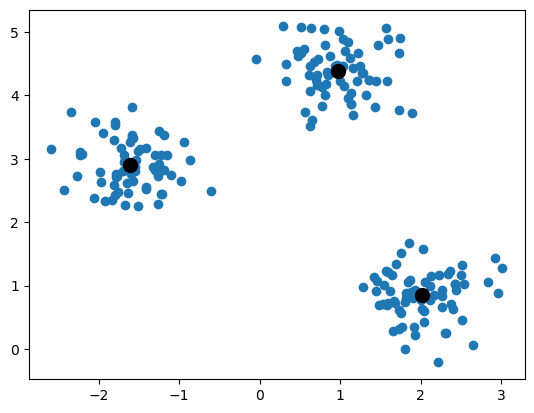

In [86]:

k_means = KMeans(n_clusters=3, init= "k-means++", n_init=10, max_iter=300, random_state=0)
ypred=k_means.fit_predict(X)
plt.scatter(X[:,0], X[:, 1])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c = 'black')
plt.show()